# Unidad 5 - Transformación de datos

**Ejercicio N° 1**

Los **exoplanetas o planetas extrasolares** son planetas que orbitan alrededor de otras estrellas que se encuentran más allá de nuestro sistema solar. El dataset `exoplanets.csv` , extraído del [**Archivo de Exoplanetas de la NASA**](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars), registra los descubrimientos de exoplanetas que han sido reportados a la fecha en publicaciones científicas revisadas por pares y confirmados utilizando varios métodos de detección y/o técnicas analíticas.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets\exoplanets.csv", header=36)
df.sample(3)

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_10836\251984895.py:1: SyntaxWarning: invalid escape sequence '\e'
  df = pd.read_csv("datasets\exoplanets.csv", header=36)


,51 Eri b,51 Eri,3,1,Imaging,2015,Gemini Observatory,0,11688.00000000,13.200000,...,[M/H],4.31,04h37m36.18s,69.4007424,-02d28m25.77s,-2.4738245,29.7575000,5.2114900,4.5370000,5.1580600
683,HD 156411 b,HD 156411,1,1,Radial Velocity,2009,La Silla Observatory,0,842.200000,1.880,...,[Fe/H],4.07,17h19m51.35s,259.963952,-48d33m00.83s,-48.550231,56.8655,6.670,5.170,6.51210
5319,TOI-421 c,TOI-421,2,2,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),0,16.067541,0.117,...,[Fe/H],4.48,05h27m24.79s,81.853282,-14d16m36.27s,-14.276740,74.7969,9.931,8.071,9.77776
1694,K2-384 b,K2-384,1,5,Transit,2022,K2,0,2.231527,NaN,...,[Fe/H],4.87,01h21m59.96s,20.499840,+00d45m03.49s,0.750970,82.6603,16.120,11.294,15.02760


1. El **periodo orbital** de un exoplaneta (`pl_orbper`) es el tiempo que tarda dicho planeta en dar una vuelta completa alrededor de la estrella que orbita (en días terrestres).
    
a) Realice una descripción general de dicha variable que incluya tipo de variable, valores mínimo y máximo que toma y presencia de datos faltantes.


In [22]:
print(f'\"pl_orbper\" presenta {df["pl_orbper"].isna().sum()} valores nulos')
df['pl_orbper'].describe()

"pl_orbper" presenta 281 valores nulos


count    5.506000e+03
mean     7.769049e+04
std      5.420143e+06
min      9.070629e-02
25%      4.394872e+00
50%      1.133086e+01
75%      4.009320e+01
max      4.020000e+08
Name: pl_orbper, dtype: float64

    
b) Un astrónomo se propone estudiar la distribución del periodo orbital de los exoplanetas descubiertos hasta la fecha y decide, en primera instancia, representar todos los registros a través de un histograma. Utilizando los valores observados de la variable de interés y unas pocas líneas de código obtiene el siguiente gráfico:
    
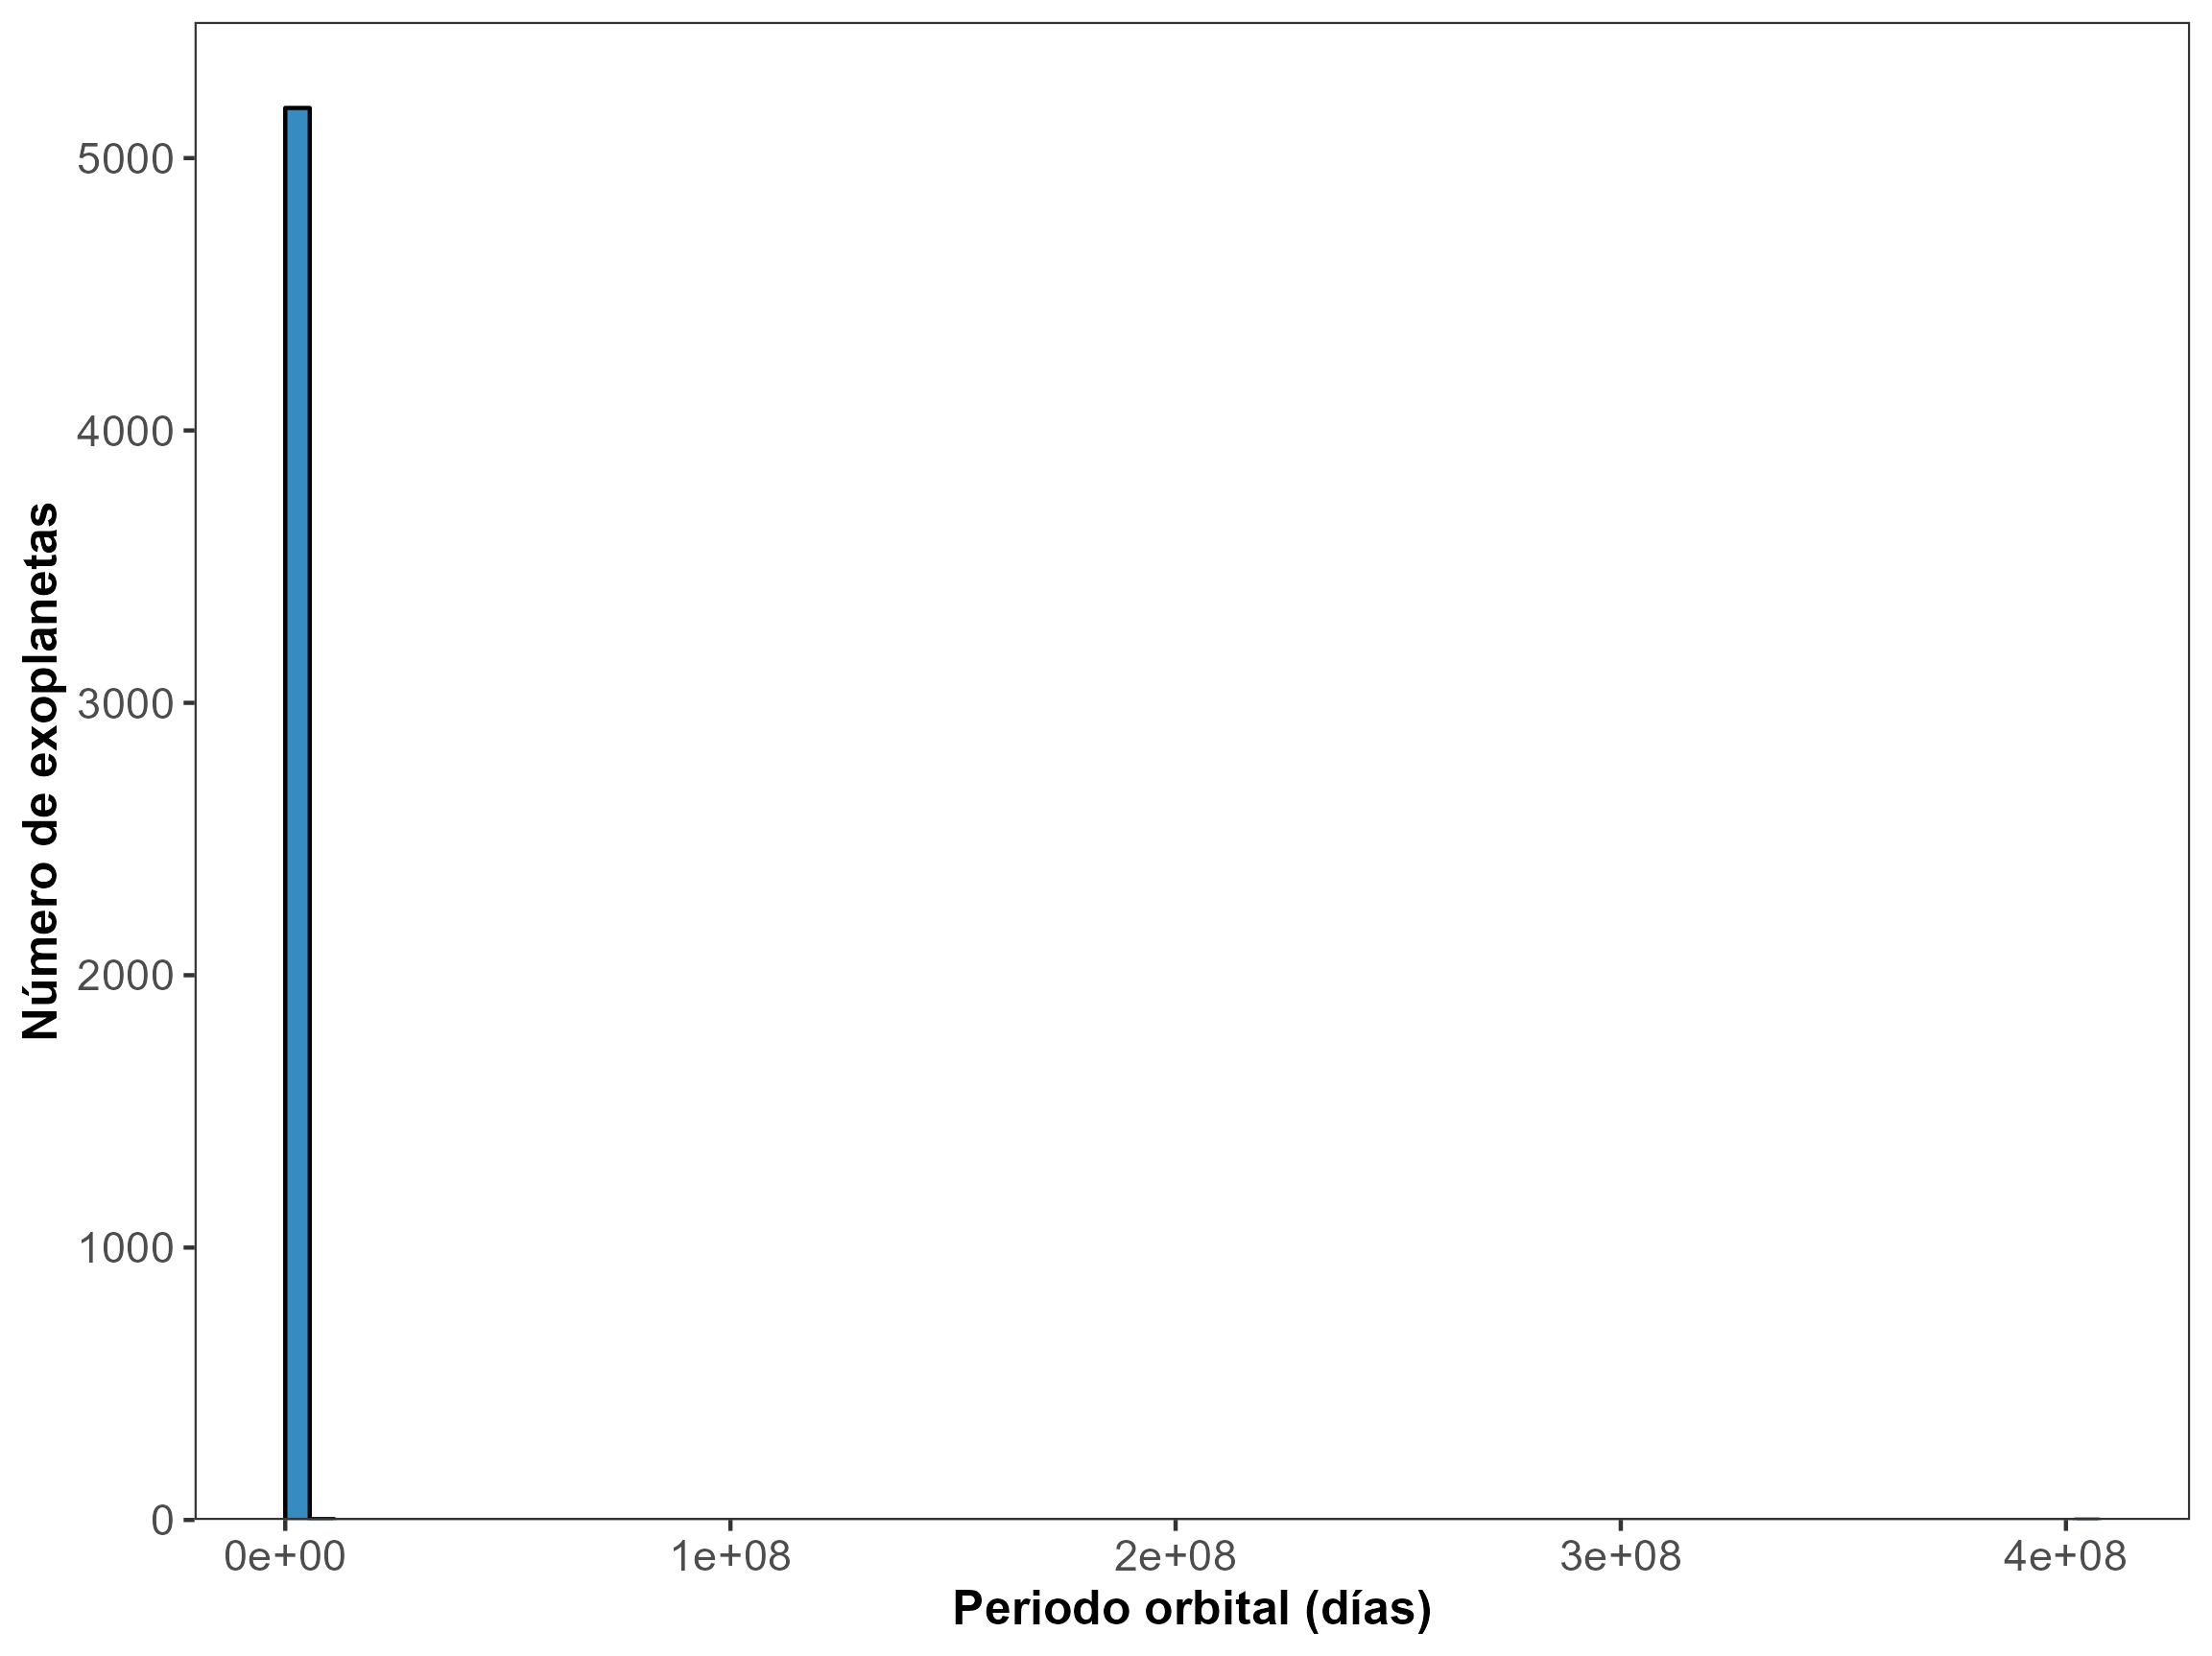



**i.** ¿Considera que el gráfico anterior es representativo de la distribución real de la variable bajo estudio? ¿Qué podría hacer para mejorarlo?



In [23]:
#El gráfico no puede brindar información relevante para ver la distribución, más que saber que está muy sesgada hacia la derecha.
# Para mejorarlo está la posibilidad de aplicar una normalización con una transformación logarítmica

''' Teoría de aplicación de transformación logarítmica. Cuándo aplicarla:
Sesgo o asimetría en la distribución:
Cuando los datos están sesgados, la transformación logarítmica puede ayudar a hacer que los datos sean más simétricos y,
por lo tanto, más manejables para el análisis. Esto puede hacer que los supuestos de muchos modelos estadísticos (como la normalidad) sean más apropiados.

Relaciones no lineales:
Si la relación entre dos variables es exponencial en lugar de lineal, tomar el logaritmo de una o ambas variables puede convertir la relación en una relación lineal,
lo que facilita su análisis.

Manejo de grandes rangos de valores:
En muchos conjuntos de datos, algunos valores pueden ser muy grandes en comparación con otros.
En estos casos, la transformación logarítmica puede comprimir los valores más grandes más que los pequeños, lo que permite un manejo más fácil de los datos
'''
# En el caso nuestro se nos presentan la primer y tercer situación: una gran asimetría y un gran rango de valores.

' Teoría de aplicación de transformación logarítmica. Cuándo aplicarla:\nSesgo o asimetría en la distribución:\nCuando los datos están sesgados, la transformación logarítmica puede ayudar a hacer que los datos sean más simétricos y,\npor lo tanto, más manejables para el análisis. Esto puede hacer que los supuestos de muchos modelos estadísticos (como la normalidad) sean más apropiados.\n\nRelaciones no lineales:\nSi la relación entre dos variables es exponencial en lugar de lineal, tomar el logaritmo de una o ambas variables puede convertir la relación en una relación lineal,\nlo que facilita su análisis.\n\nManejo de grandes rangos de valores:\nEn muchos conjuntos de datos, algunos valores pueden ser muy grandes en comparación con otros.\nEn estos casos, la transformación logarítmica puede comprimir los valores más grandes más que los pequeños, lo que permite un manejo más fácil de los datos\n'


**ii.** Teniendo en cuenta su respuesta a la pregunta del ítem anterior, realice un histograma para representar la distribución de la variable **introduciendo las modificaciones que considere adecuadas**. ¿Qué puede decir acerca de la distribución del periodo orbital de los exoplanetas descubiertos?


Text(0.5, 0, 'Período orbital')

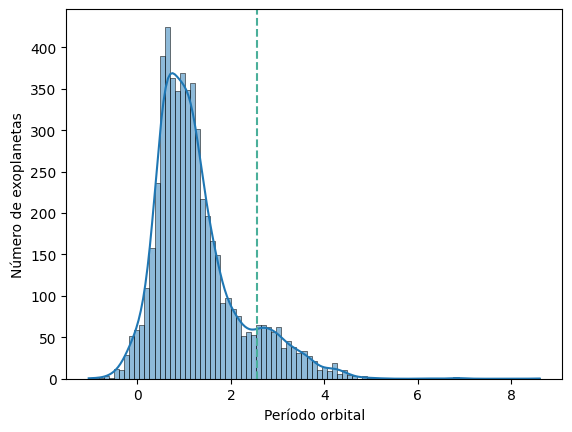

In [24]:
df['pl_orbper_log'] = np.log10(df['pl_orbper'])
tierra_log = np.log10(365)
sns.histplot(data=df, x='pl_orbper_log', kde=True)
plt.axvline(np.log10(365), linestyle='--', color='#4aaf9a')

plt.ylabel("Número de exoplanetas")
plt.xlabel("Período orbital")

**iii.** Represente el periodo orbital de nuestro planeta en el gráfico realizado en el ítem anterior y calcule el porcentaje de exoplanetas que poseen años más extensos que el año terrestre.

Text(6, 250, '10.58%')

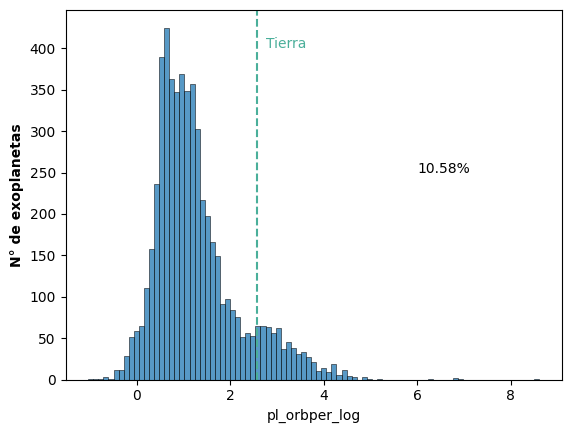

In [25]:
planetas_con_año_mas_largo = round(((df['pl_orbper_log'] > np.log10(365)).sum()*100/len(df)),2)
sns.histplot(df['pl_orbper_log'])
plt.axvline(tierra_log, linestyle='--', color='#4aaf9a')
plt.ylabel("N° de exoplanetas", weight='bold')
plt.text(tierra_log + 0.2, 400, "Tierra", color='#4aaf9a')
plt.text(6, 250, f'{planetas_con_año_mas_largo}%')

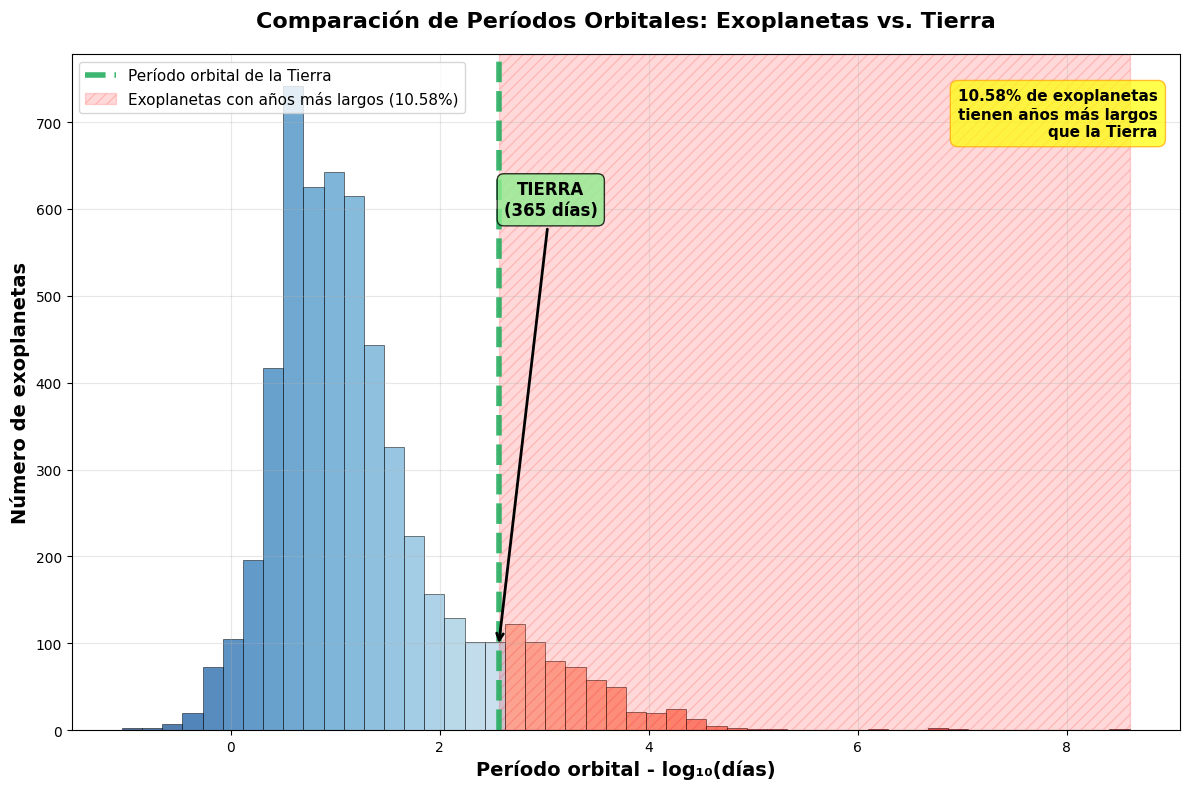

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculos y variables previas
df['pl_orbper_log'] = np.log10(df['pl_orbper'])
planetas_con_año_mas_largo = round(((df['pl_orbper_log'] > np.log10(365)).sum()*100/len(df)),2)
tierra_log = np.log10(365)

# Crear figura
plt.figure(figsize=(12, 8))

# Crear histograma base
counts, bins_edges, patches = plt.hist(df['pl_orbper_log'], bins=50, alpha=0.7,
                                      color='lightblue', edgecolor='black', linewidth=0.5)

# Aplicar colores basados en la posición relativa a la Tierra
for i, (patch, bin_center) in enumerate(zip(patches, (bins_edges[:-1] + bins_edges[1:]) / 2)):
    if bin_center < tierra_log:
        # Gradiente azul para planetas más rápidos
        intensity = (tierra_log - bin_center) / (tierra_log - df['pl_orbper_log'].min())
        patch.set_facecolor(plt.cm.Blues(0.3 + 0.7 * intensity))
    else:
        # Gradiente rojo para planetas más lentos
        intensity = (bin_center - tierra_log) / (df['pl_orbper_log'].max() - tierra_log)
        patch.set_facecolor(plt.cm.Reds(0.3 + 0.7 * intensity))

# Línea de la Tierra más prominente
plt.axvline(tierra_log, linestyle='--', color='#27ae60', linewidth=4, alpha=0.9, label='Período orbital de la Tierra')

# Región sombreada con patrón
plt.axvspan(tierra_log, df['pl_orbper_log'].max(), alpha=0.15, color='red',
           hatch='///', label=f'Exoplanetas con años más largos ({planetas_con_año_mas_largo}%)')

plt.ylabel("Número de exoplanetas", fontsize=14, weight='bold')
plt.xlabel("Período orbital - log₁₀(días)", fontsize=14, weight='bold')
plt.title("Comparación de Períodos Orbitales: Exoplanetas vs. Tierra", fontsize=16, weight='bold', pad=20)

# Anotaciones mejoradas
plt.annotate('TIERRA\n(365 días)', xy=(tierra_log, 97), xytext=(tierra_log + 0.5, max(counts) * 0.8),
            arrowprops=dict(arrowstyle='->', color='black', lw=2),
            fontsize=12, weight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.4", facecolor='lightgreen', alpha=0.8))

# Estadística destacada
plt.text(0.98, 0.95, f'{planetas_con_año_mas_largo}% de exoplanetas\ntienen años más largos\nque la Tierra',
         transform=plt.gca().transAxes, fontsize=11, weight='bold',
         ha='right', va='top',
         bbox=dict(boxstyle="round,pad=0.5", facecolor='yellow', alpha=0.7, edgecolor='orange'))

plt.legend(loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


1. Construya un gráfico que permita visualizar la distribución del número de planetas extrasolares encontrados según año y método de descubrimiento, **en el que la variable temporal se encuentre categorizada en lustros** (periodos de 5 años). Comente brevemente lo observado.


1992 2024
[1990. 1995. 2000. 2005. 2010. 2015. 2020. 2025.]


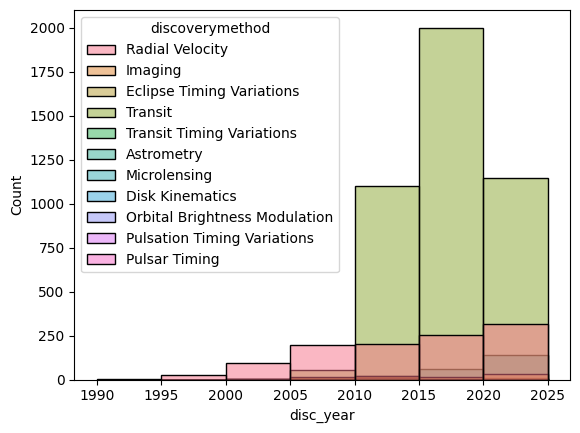

In [27]:
#se necesita agrupar los años en lustros
print(df['disc_year'].min(),df['disc_year'].max())
bins = np.arange(1990, 2025.1, 5)
print(bins)

sns.histplot(data=df, x=df['disc_year'], bins=bins, hue='discoverymethod')
plt.xticks(bins)
plt.show()

In [28]:
#se necesita agrupar los años en lustros
bins = np.arange(1990, 2025.1, 5) # año mínimo 1992, año máximo 2024
labels = ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019', '2020-2024']
df['disc_year_cat'] = pd.cut(df['disc_year'], bins=bins, labels=labels, right=False)

In [29]:
tabla_metodos = df.groupby(['disc_year_cat', 'discoverymethod'])['discoverymethod'].count().reset_index(name='count')

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_35848\642492631.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_metodos = df.groupby(['disc_year_cat', 'discoverymethod'])['discoverymethod'].count().reset_index(name='count')


Text(0.5, 0, 'Período')

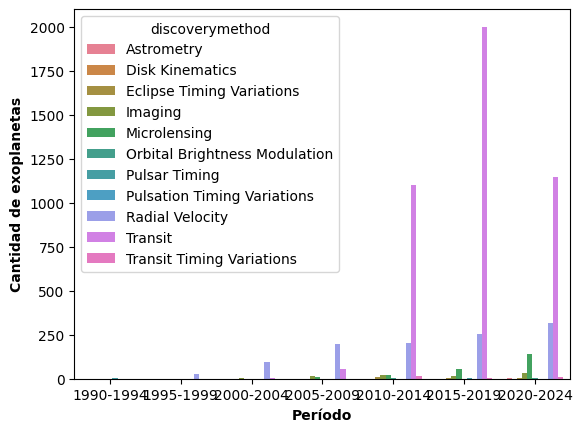

In [30]:
sns.barplot(data=tabla_metodos, x='disc_year_cat', y='count', hue='discoverymethod')
plt.ylabel("Cantidad de exoplanetas",weight='bold')
plt.xlabel("Período", weight='bold')

In [31]:
#conteo de las ocurrencias de cada discoverymethod
df['discoverymethod'].value_counts()

discoverymethod
Transit                          4309
Radial Velocity                  1094
Microlensing                      230
Imaging                            82
Transit Timing Variations          32
Eclipse Timing Variations          17
Orbital Brightness Modulation       9
Pulsar Timing                       8
Astrometry                          3
Pulsation Timing Variations         2
Disk Kinematics                     1
Name: count, dtype: int64

In [32]:
df['discovery_method_recat'] = df['discoverymethod'].apply(lambda x: x if x in ['Transit','Radial Velocity','Microlensing','Imaging'] else 'Other')

In [33]:
df['discovery_method_recat'].value_counts()

discovery_method_recat
Transit            4309
Radial Velocity    1094
Microlensing        230
Imaging              82
Other                72
Name: count, dtype: int64

In [34]:
tabla_metodos_importantes = df.groupby(['disc_year_cat', 'discovery_method_recat']).size().reset_index().rename(columns={0 : 'count'})
tabla_metodos_importantes

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_35848\459070498.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_metodos_importantes = df.groupby(['disc_year_cat', 'discovery_method_recat']).size().reset_index().rename(columns={0 : 'count'})


,disc_year_cat,discovery_method_recat,count
0,1990-1994,Imaging,0
1,1990-1994,Microlensing,0
2,1990-1994,Other,3
3,1990-1994,Radial Velocity,0
4,1990-1994,Transit,0
5,1995-1999,Imaging,0
6,1995-1999,Microlensing,0
7,1995-1999,Other,0
8,1995-1999,Radial Velocity,27
9,1995-1999,Transit,0


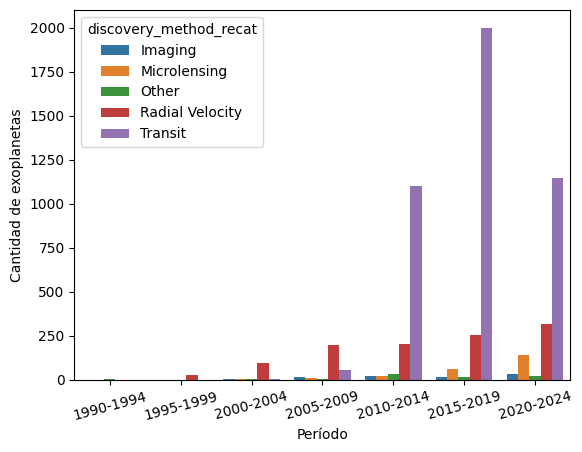

In [35]:
sns.barplot(data=tabla_metodos_importantes, x='disc_year_cat', y='count', hue='discovery_method_recat')
plt.xlabel("Período")
plt.ylabel("Cantidad de exoplanetas")
plt.xticks(rotation=15)
plt.show()

2. Tomando en cuenta únicamente los exoplanetas descubiertos mediante las técnicas de velocidad radial, tránsito y detección directa, construya un gráfico que le permita visualizar, en forma conjunta, el periodo orbital y la masa (`pl_bmasse`) de los planetas según el método a través del cual se detectaron. ¿Encuentra alguna diferencia en las características de los exoplanetas descubiertos por las distintas técnicas?

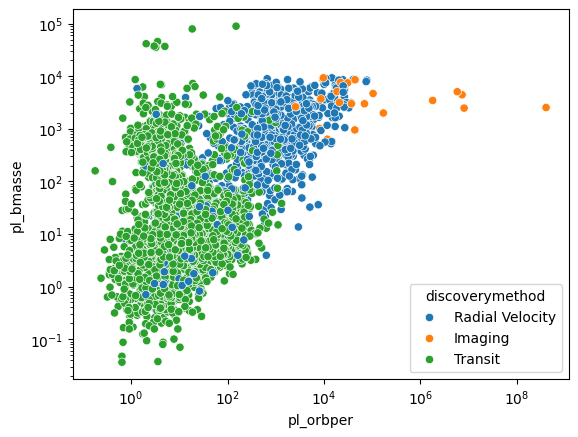

In [36]:
df_tecnicas_filtradas = df[df['discoverymethod'].isin(['Radial Velocity', 'Transit','Imaging'])]

sns.scatterplot(df_tecnicas_filtradas, x='pl_orbper', y='pl_bmasse', hue='discoverymethod')
plt.xscale('log')
plt.yscale('log')

***Las diferencias que encontramos es que los planetas descubiertos por imaging y radial velocity requieren de masas y órbitas más grandes. mientras que esto no sucede con los descubiertos por transit, ya que se muestra en la parte izquierda del gráfico que llegan a cubrir toda esa sección (color verde)***


3. Johannes Kepler fue un astrónomo y matemático alemán cuya principal contribución científica fue el descubrimiento las leyes que rigen el movimiento de los planetas. Según la Tercera Ley de Kepler del movimiento planetario, el cubo de la distancia media de un planeta a la estrella que éste orbita (D, o semi-eje mayor de la órbita, que equivale a la mitad de la suma de la distancia más grande y la más pequeña a la estrella) es directamente proporcional al cuadrado de su periodo orbital (P):
    
$$D^3 = kP^2$$
    
Realizando las transformaciones que considere necesarias sobre las variables, verifique gráficamente el cumplimiento de dicha ley para los planetas extrasolares.

(0.0, 25000.0)

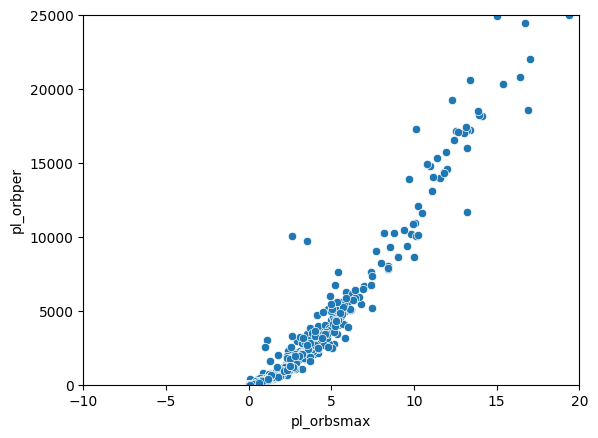

In [37]:
sns.scatterplot(data=df, x='pl_orbsmax', y='pl_orbper')
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(-10, 20)
plt.ylim(0,25000)

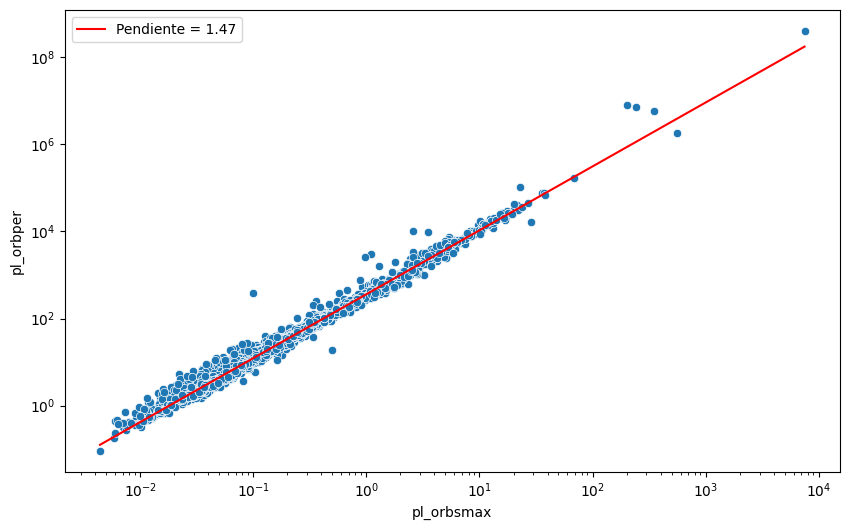

Pendiente = 1.47


In [38]:
import numpy as np
from scipy import stats

# Crear el gráfico log-log
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pl_orbsmax', y='pl_orbper')
plt.xscale('log')
plt.yscale('log')

# Calcular la regresión lineal en escala log
# Primero necesitas datos sin valores nulos
df_clean = df.dropna(subset=['pl_orbsmax', 'pl_orbper'])
x = np.log10(df_clean['pl_orbsmax'])
y = np.log10(df_clean['pl_orbper'])

# Hacer la regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Crear la línea de tendencia
x_line = np.linspace(x.min(), x.max(), 100)
y_line = slope * x_line + intercept

# Convertir de vuelta a escala original para graficar
plt.plot(10**x_line, 10**y_line, 'r-', label=f'Pendiente = {slope:.2f}')
plt.legend()
plt.show()

print(f"Pendiente = {slope:.2f}")

# Análisis Detallado de la Regresión Lineal en la Ley de Kepler



## El Contexto Astronómico Fundamental

### Las Leyes de Kepler: Una Revolución Científica

Johannes Kepler (1571-1630) revolucionó nuestra comprensión del cosmos al descubrir tres leyes fundamentales que gobiernan el movimiento planetario. Su tercera ley, la que nos ocupa, establece una relación matemática precisa entre dos características orbitales cruciales:

**D³ = k × P²**

Donde D representa el semi-eje mayor de la órbita (la distancia promedio del planeta a su estrella) y P es el período orbital (el tiempo que tarda en completar una órbita completa). La constante k depende de la masa de la estrella central.

Esta ley surgió del análisis meticuloso de las observaciones de Tycho Brahe sobre Marte, y representa uno de los primeros ejemplos de una ley física expresada matemáticamente. Lo que hace especial a esta ley es que conecta el espacio (distancia) con el tiempo (período) de manera fundamental.

### Por Qué Funciona Esta Ley: La Física Subyacente

La tercera ley de Kepler no es solo una curiosidad matemática; es una consecuencia directa de la ley de gravitación universal de Newton. Cuando un planeta orbita una estrella, la fuerza gravitacional proporciona exactamente la fuerza centrípeta necesaria para mantener el movimiento circular:

**F_gravitacional = F_centrípeta**

Esto lleva directamente a la relación D³ ∝ P², conectando la mecánica clásica con las observaciones astronómicas.

## La Transformación Matemática: De Potencias a Líneas Rectas

### El Problema de las Relaciones de Potencia

Cuando tenemos una relación como D³ ∝ P², o equivalentemente D ∝ P^(2/3), graficarlo directamente produce una curva. Las curvas son difíciles de analizar visualmente y estadísticamente. ¿Cómo podemos convertir esta relación curva en algo lineal?

### La Magia de los Logaritmos

Los logaritmos transforman multiplicaciones en sumas y potencias en multiplicaciones. Si tenemos:

**D = k × P^(2/3)**

Aplicando logaritmo a ambos lados:

**log(D) = log(k) + (2/3) × log(P)**

¡Esta es la ecuación de una línea recta! Si definimos:
- Y = log(D)
- X = log(P)
- m = 2/3 (pendiente)
- b = log(k) (intercepto)

Entonces: **Y = m × X + b**

### Por Qué Usamos log₁₀

En tu código, cuando calculas `x = np.log10(df_clean['pl_orbsmax'])`, estás usando logaritmo base 10. Esto es conveniente porque:

1. Los valores astronómicos varían por órdenes de magnitud (factores de 10, 100, 1000, etc.)
2. Es más fácil interpretar: cada unidad en el eje log representa un factor de 10
3. Es la convención estándar en muchos campos científicos

## Desmenuzando `stats.linregress(x, y)`

### ¿Qué Es la Regresión Lineal?

La regresión lineal busca la "mejor" línea recta que pase por un conjunto de puntos. "Mejor" significa que minimiza la suma de los cuadrados de las distancias verticales entre los puntos y la línea (método de mínimos cuadrados).

Matemáticamente, buscamos los parámetros m (pendiente) y b (intercepto) que minimizan:

**Σ(yᵢ - (m×xᵢ + b))²**

### Los Cinco Valores Que Devuelve la Función

#### 1. `slope` (Pendiente)

**Definición Matemática**: La pendiente m en la ecuación Y = mX + b

**Cálculo**: m = Σ[(xᵢ - x̄)(yᵢ - ȳ)] / Σ[(xᵢ - x̄)²]

Donde x̄ y ȳ son las medias de x e y respectivamente.

**Interpretación Física**: En tu caso, como graficaste P vs D (período vs distancia), la pendiente te dice cómo cambia log(P) cuando cambia log(D). Tu valor de 1.47 significa que por cada unidad que aumenta log(D), log(P) aumenta 1.47 unidades.

**Conexión con Kepler**: Si la tercera ley se cumple perfectamente, esperaríamos que P ∝ D^(3/2), por lo que la pendiente debería ser 3/2 = 1.5. Tu valor de 1.47 está muy cerca, confirmando la ley.

#### 2. `intercept` (Intercepto)

**Definición Matemática**: El valor b en Y = mX + b, donde la línea cruza el eje Y (cuando X = 0)

**Cálculo**: b = ȳ - m×x̄

**Interpretación Física**: En escala logarítmica, cuando log(D) = 0 (es decir, D = 1 AU), el intercepto te dice cuál sería log(P). Transformado de vuelta, 10^(intercept) te da el período en días para un planeta que orbita a 1 AU de su estrella.

**Significado Astronómico**: Este valor está relacionado con la masa de las estrellas en tu muestra. Estrellas más masivas tendrían interceptos diferentes.

#### 3. `r_value` (Coeficiente de Correlación)

**Definición Matemática**: Una medida de qué tan bien se correlacionan linealmente x e y, variando entre -1 y +1

**Cálculo**: r = Σ[(xᵢ - x̄)(yᵢ - ȳ)] / √[Σ(xᵢ - x̄)² × Σ(yᵢ - ȳ)²]

**Interpretación**:
- r = +1: Correlación positiva perfecta
- r = 0: No hay correlación lineal
- r = -1: Correlación negativa perfecta

**En tu contexto**: Un valor cercano a +1 indica que la ley de Kepler se cumple muy bien en tu dataset. Valores típicos para datos astronómicos reales suelen estar entre 0.95 y 0.99.

#### 4. `p_value` (Valor p)

**Definición Estadística**: La probabilidad de obtener un resultado al menos tan extremo como el observado, asumiendo que no hay relación real entre las variables (hipótesis nula)

**Interpretación**:
- p < 0.05: Evidencia fuerte de que existe una relación real
- p < 0.01: Evidencia muy fuerte
- p < 0.001: Evidencia extremadamente fuerte

**En astronomía**: Para la ley de Kepler con miles de exoplanetas, esperarías un p-value prácticamente de cero (algo como 1×10⁻²⁰⁰), indicando que la correlación no es casualidad.

**Limitaciones**: El p-value asume que los errores son independientes y normalmente distribuidos, lo cual puede no ser cierto para datos astronómicos.

#### 5. `std_err` (Error Estándar)

**Definición Matemática**: Una medida de la incertidumbre en la estimación de la pendiente

**Cálculo**: std_err = √[Σ(yᵢ - ŷᵢ)² / ((n-2) × Σ(xᵢ - x̄)²)]

Donde ŷᵢ son los valores predichos por la línea de regresión.

**Interpretación Práctica**: Te permite construir intervalos de confianza para la pendiente. Por ejemplo, hay aproximadamente 95% de probabilidad de que la pendiente real esté entre (slope - 2×std_err) y (slope + 2×std_err).

**Aplicación a Kepler**: Si tu std_err es pequeño comparado con la diferencia entre tu pendiente observada (1.47) y la teórica (1.5), entonces la diferencia es estadísticamente significativa y podría indicar efectos físicos reales.

## Consideraciones Especiales para Datos Astronómicos

### Sesgos Observacionales

Los datos de exoplanetas no son una muestra aleatoria del universo. Hay sesgos importantes:

1. **Sesgo de detección**: Es más fácil detectar planetas grandes y cercanos a sus estrellas
2. **Sesgo temporal**: Planetas con períodos muy largos pueden no haber completado una órbita desde que comenzamos a observar
3. **Sesgo de brillo**: Solo podemos detectar planetas alrededor de estrellas suficientemente brillantes

### Incertidumbres en las Mediciones

A diferencia de experimentos de laboratorio, las mediciones astronómicas tienen incertidumbres significativas:

1. **Ruido instrumental**: Los detectores tienen limitaciones
2. **Efectos atmosféricos**: La atmósfera terrestre distorsiona las observaciones
3. **Variabilidad estelar**: Las estrellas mismas cambian con el tiempo

### Efectos Físicos Reales

La desviación de tu pendiente (1.47) del valor teórico (1.5) podría deberse a:

1. **Efectos de marea**: Planetas muy cercanos pueden estar distorsionados por fuerzas de marea
2. **Interacciones planeta-planeta**: En sistemas con múltiples planetas, las órbitas pueden estar perturbadas
3. **Evolución orbital**: Las órbitas pueden cambiar con el tiempo debido a varios mecanismos

## Implicaciones del Resultado

### Validación de la Física Fundamental

El hecho de que obtengas una pendiente tan cercana al valor teórico (1.47 vs 1.5) es una validación extraordinaria de:

1. La ley de gravitación universal de Newton
2. La mecánica clásica aplicada a escalas astronómicas
3. La precisión de nuestros métodos de detección y medición de exoplanetas

### Límites de la Ley de Kepler

Tu análisis también revela los límites de aplicabilidad:

1. La ley asume órbitas puramente elípticas sin perturbaciones
2. Ignora efectos relativistas (importantes para planetas muy cercanos a estrellas masivas)
3. No considera la evolución temporal de los sistemas planetarios

## Próximos Pasos Sugeridos

Para profundizar tu análisis, podrías considerar:

1. **Analizar residuos**: Estudiar las desviaciones de la línea para identificar patrones
2. **Estratificar por tipo de estrella**: Ver si estrellas de diferentes masas muestran comportamientos distintos
3. **Considerar incertidumbres**: Usar regresión ponderada si tienes datos de incertidumbre
4. **Comparar métodos de detección**: Ver si diferentes técnicas de detección muestran sesgos diferentes

Este análisis de regresión no es solo un ejercicio estadístico; es una ventana hacia la comprensión de los procesos físicos fundamentales que gobiernan la estructura y evolución de los sistemas planetarios en nuestra galaxia.